In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import torch
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import random
import os
from PIL import Image


In [26]:
# Directory containing the images
noisy_img_dir = r"IMAGES"

# List to hold the loaded images as NumPy arrays
CUBS_images = []

# Load all images from the specified directory
for filename in os.listdir(noisy_img_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Add any other image formats you expect
        img_path = os.path.join(noisy_img_dir, filename)
        try:
            img = Image.open(img_path)
            img_array = np.array(img)  # Convert the image to a NumPy array
            CUBS_images.append(img_array)
            print(f"Loaded image: {filename}")
        except Exception as e:
            print(f"Error loading image {filename}: {e}")

Loaded image: clin_0001_L.png
Loaded image: clin_0001_R.png
Loaded image: clin_0002_L.png
Loaded image: clin_0002_R.png
Loaded image: clin_0003_L.png
Loaded image: clin_0003_R.png
Loaded image: clin_0004_L.png
Loaded image: clin_0004_R.png
Loaded image: clin_0005_L.png
Loaded image: clin_0005_R.png
Loaded image: clin_0006_L.png
Loaded image: clin_0006_R.png
Loaded image: clin_0007_L.png
Loaded image: clin_0007_R.png
Loaded image: clin_0008_L.png
Loaded image: clin_0008_R.png
Loaded image: clin_0009_L.png
Loaded image: clin_0009_R.png
Loaded image: clin_0010_L.png
Loaded image: clin_0010_R.png
Loaded image: clin_0011_L.png
Loaded image: clin_0011_R.png
Loaded image: clin_0012_L.png
Loaded image: clin_0012_R.png
Loaded image: clin_0013_L.png
Loaded image: clin_0013_R.png
Loaded image: clin_0014_L.png
Loaded image: clin_0014_R.png
Loaded image: clin_0015_L.png
Loaded image: clin_0015_R.png
Loaded image: clin_0016_L.png
Loaded image: clin_0016_R.png
Loaded image: clin_0017_L.png
Loaded ima

In [34]:
# Get a random subset of 3 images
random.seed(4)
random_subset = random.sample(CUBS_images, 3)

random_subset = [img / 255.0 for img in random_subset]

for i, img in enumerate(random_subset):
    
    print(f"Random Image {i+1}: Shape = {img_array.shape}, Data Type = {img_array.dtype}")

Random Image 1: Shape = (480, 480), Data Type = uint8
Random Image 2: Shape = (480, 480), Data Type = uint8
Random Image 3: Shape = (480, 480), Data Type = uint8


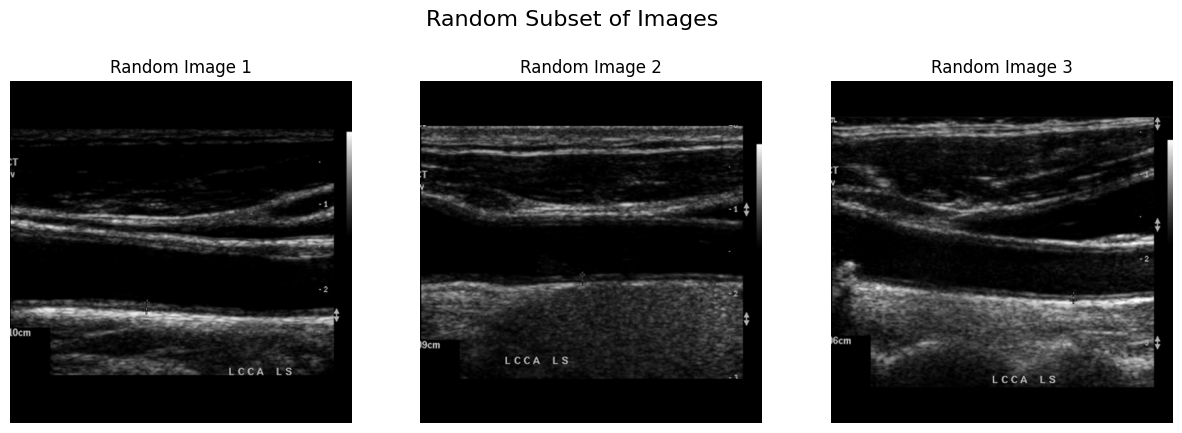

In [78]:
import matplotlib.pyplot as plt

def show_set(set, title=""):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i, img in enumerate(set):
        axs[i].imshow(img, cmap="gray")
        axs[i].axis('off')  # Hide the axes
        axs[i].set_title(f"Random Image {i+1}")
    
    fig.suptitle(title, fontsize=16)  # Add a super title for the entire figure
    
    plt.show()

# Example usage
show_set(random_subset, title="Random Subset of Images")


In [36]:
random_subset[0].max()

1.0

# Denoising algorithms

In [59]:
import bm3d
import cv2

## Non-local means

Denoised Image 1: Shape = (480, 480, 3), Data Type = uint8
Denoised Image 2: Shape = (480, 480, 3), Data Type = uint8
Denoised Image 3: Shape = (480, 480, 3), Data Type = uint8


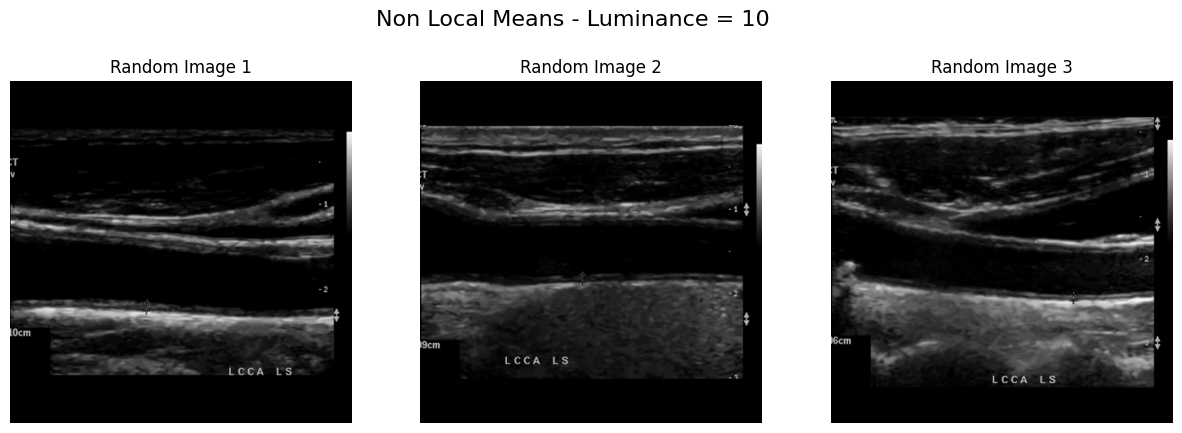

In [80]:
def nl_means(lum = 10):
    nonlocal_means = []
    for i, img in enumerate(random_subset):
        # Convert the normalized image back to 8-bit format for OpenCV processing
        img_uint8 = np.uint8(img * 255)
        img_uint8 = cv2.cvtColor(img_uint8, cv2.COLOR_GRAY2BGR)
        denoised_img = cv2.fastNlMeansDenoisingColored(img_uint8, None, lum, 10, 7, 21)
        nonlocal_means.append(denoised_img)
        print(f"Denoised Image {i+1}: Shape = {denoised_img.shape}, Data Type = {denoised_img.dtype}")
    return nonlocal_means
show_set(nl_means(10), "Non Local Means - Luminance = 10" )


Denoised Image 1: Shape = (480, 480, 3), Data Type = uint8
Denoised Image 2: Shape = (480, 480, 3), Data Type = uint8
Denoised Image 3: Shape = (480, 480, 3), Data Type = uint8


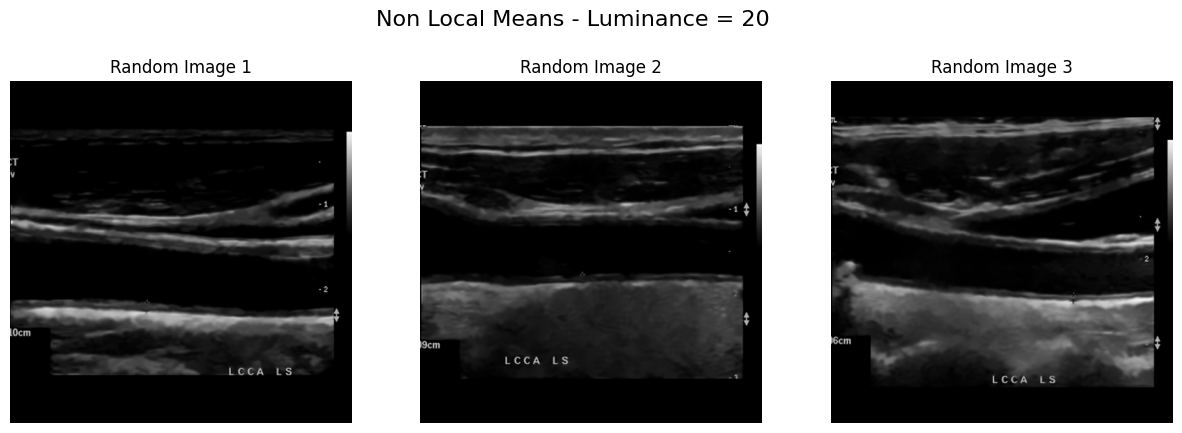

In [82]:
show_set(nl_means(20), "Non Local Means - Luminance = 20" )

Denoised Image 1: Shape = (480, 480, 3), Data Type = uint8
Denoised Image 2: Shape = (480, 480, 3), Data Type = uint8
Denoised Image 3: Shape = (480, 480, 3), Data Type = uint8


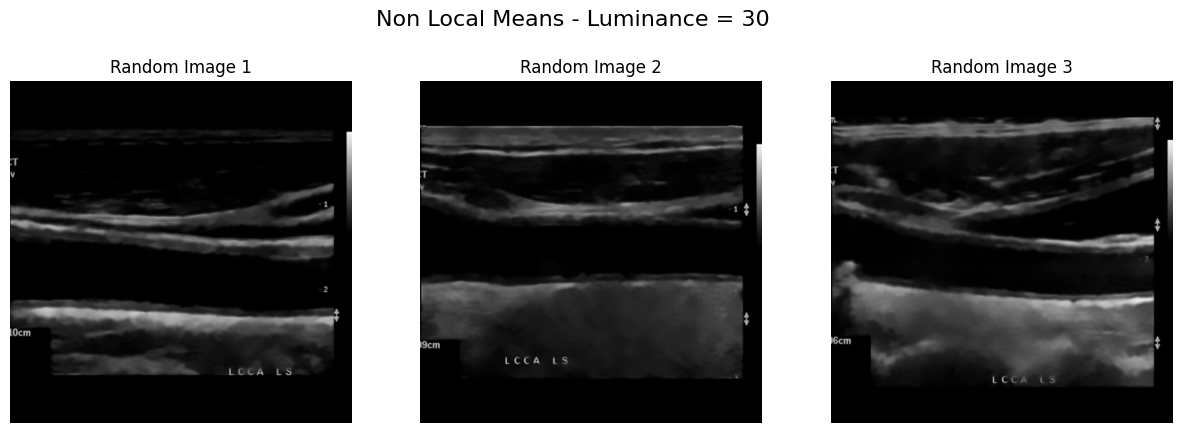

In [84]:
show_set(nl_means(30), "Non Local Means - Luminance = 30" )

## TV Chambolle

In [88]:
from skimage.restoration import denoise_tv_chambolle

def tv_chambolle(weight=0.1):
    tv_denoised = []
    for i, img in enumerate(random_subset):
        # Convert the normalized image back to the range [0, 1] for skimage processing

        denoised_img = denoise_tv_chambolle(img, weight=weight)
        tv_denoised.append(denoised_img)
        print(f"TV Denoised Image {i+1}: Shape = {denoised_img.shape}, Data Type = {denoised_img.dtype}")
    return tv_denoised


TV Denoised Image 1: Shape = (480, 480), Data Type = float64
TV Denoised Image 2: Shape = (480, 480), Data Type = float64
TV Denoised Image 3: Shape = (480, 480), Data Type = float64


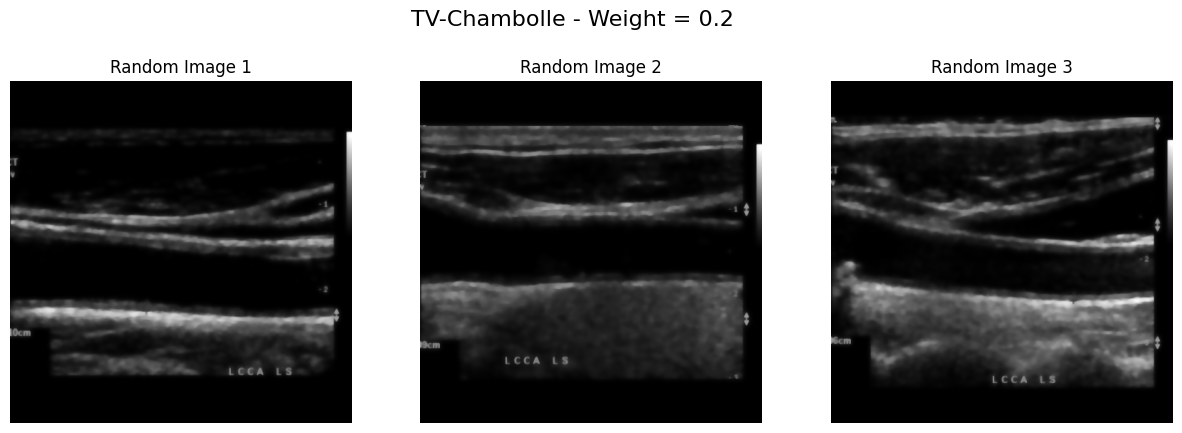

In [92]:
show_set(tv_chambolle(0.2), "TV-Chambolle - Weight = 0.2" )

## Wavelet transform

In [93]:
from skimage.restoration import denoise_wavelet

In [100]:
def wavelet_denoising(sigma=0.25):
    wavelet_denoised = []
    for i, img in enumerate(random_subset):

        denoised_img = denoise_wavelet(img, sigma=sigma)
        wavelet_denoised.append(denoised_img)
        print(f"Wavelet Denoised Image {i+1}: Shape = {denoised_img.shape}, Data Type = {denoised_img.dtype}")
    return wavelet_denoised

Wavelet Denoised Image 1: Shape = (480, 480), Data Type = float64
Wavelet Denoised Image 2: Shape = (480, 480), Data Type = float64
Wavelet Denoised Image 3: Shape = (480, 480), Data Type = float64


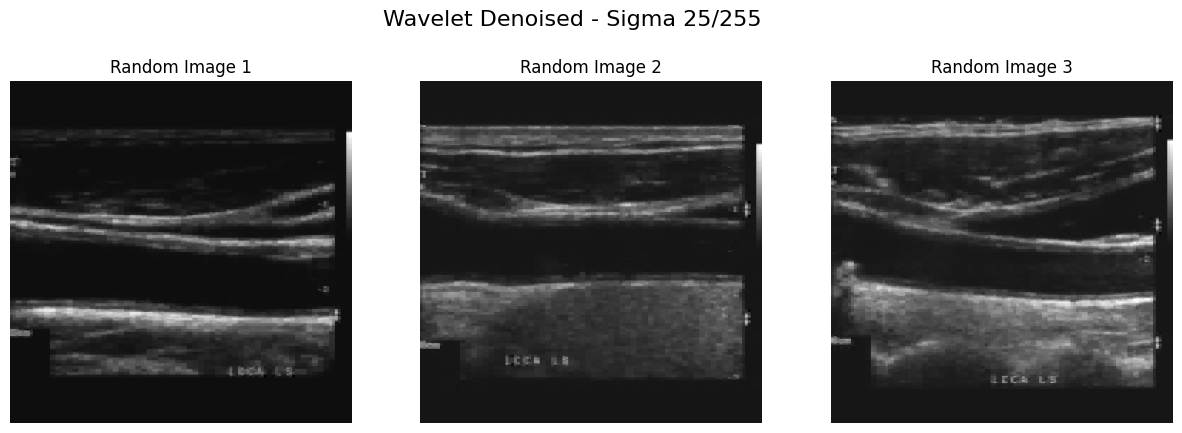

In [106]:
show_set(wavelet_denoising(sigma=25/255), "Wavelet Denoised - Sigma 25/255" )

## PCA

In [108]:
from sklearn.decomposition import PCA

def pca_denoising(n_components=0.95):
    pca_denoised = []
    for i, img in enumerate(random_subset):
        # Convert the normalized image back to the range [0, 1]
    
        
        # Flatten the image
        original_shape = img.shape
        img_flattened = img.reshape(-1, original_shape[-1])
        
        # Apply PCA
        pca = PCA(n_components=n_components, svd_solver='full')
        img_pca = pca.fit_transform(img_flattened)
        img_restored = pca.inverse_transform(img_pca)
        
        # Reshape the image back to its original shape
        img_restored = img_restored.reshape(original_shape)
        
        pca_denoised.append(img_restored)
        print(f"PCA Denoised Image {i+1}: Shape = {img_restored.shape}, Data Type = {img_restored.dtype}")
    return pca_denoised

PCA Denoised Image 1: Shape = (480, 480), Data Type = float64
PCA Denoised Image 2: Shape = (480, 480), Data Type = float64
PCA Denoised Image 3: Shape = (480, 480), Data Type = float64


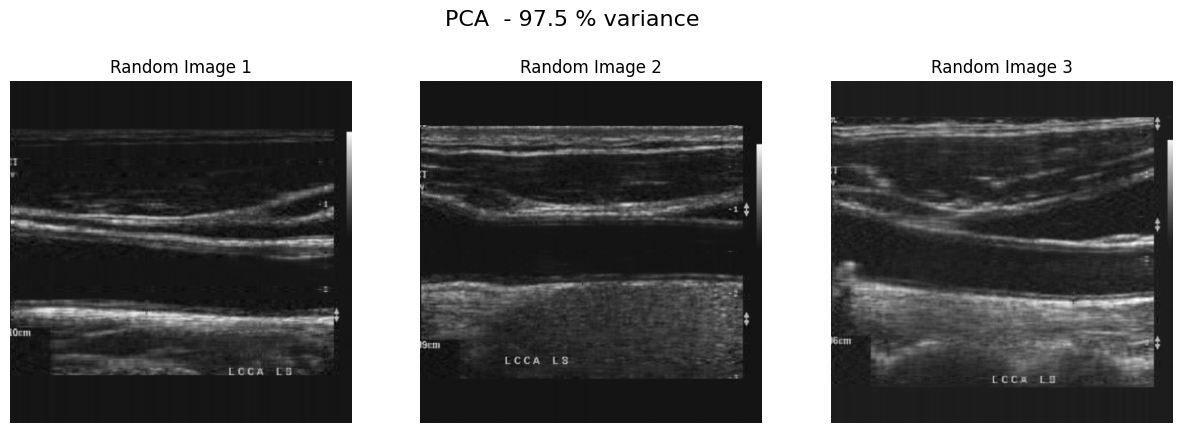

In [115]:
show_set(pca_denoising(0.975), "PCA  - 97.5 % variance" )

## BM3D

In [118]:
def bm3d_denoising(sigma_noise=25/255.0):
    bm3d_denoised = []
    for i, img in enumerate(random_subset):

                    # Apply BM3D denoising
        denoised_img = bm3d.bm3d(img, sigma_psd=sigma_noise, stage_arg=bm3d.BM3DStages.ALL_STAGES)
        
        bm3d_denoised.append(denoised_img)
        print(f"BM3D Denoised Image {i+1}: Shape = {denoised_img.shape}, Data Type = {denoised_img.dtype}")
    return bm3d_denoised

BM3D Denoised Image 1: Shape = (480, 480), Data Type = float64
BM3D Denoised Image 2: Shape = (480, 480), Data Type = float64
BM3D Denoised Image 3: Shape = (480, 480), Data Type = float64


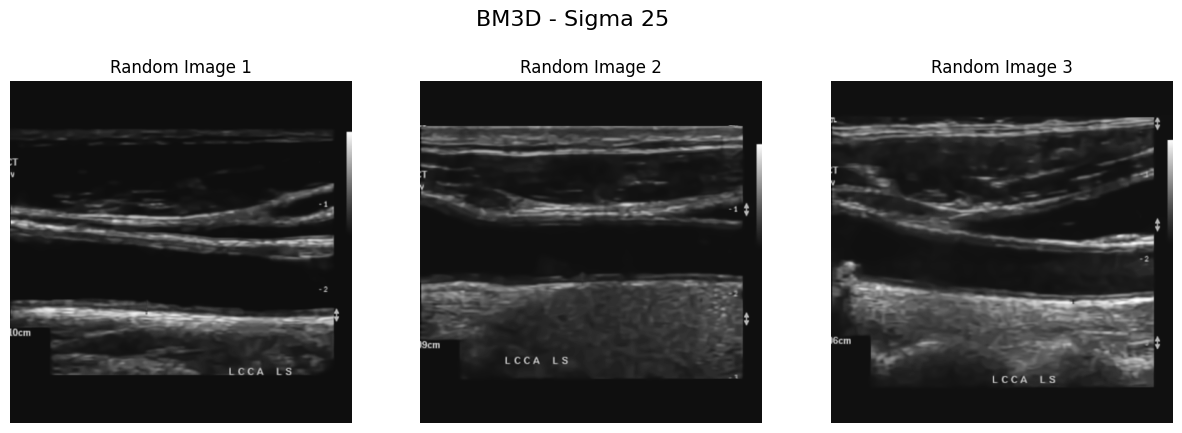

In [125]:
show_set(bm3d_denoising(25/255.0), "BM3D - Sigma 25" )

BM3D Denoised Image 1: Shape = (480, 480), Data Type = float64
BM3D Denoised Image 2: Shape = (480, 480), Data Type = float64
BM3D Denoised Image 3: Shape = (480, 480), Data Type = float64


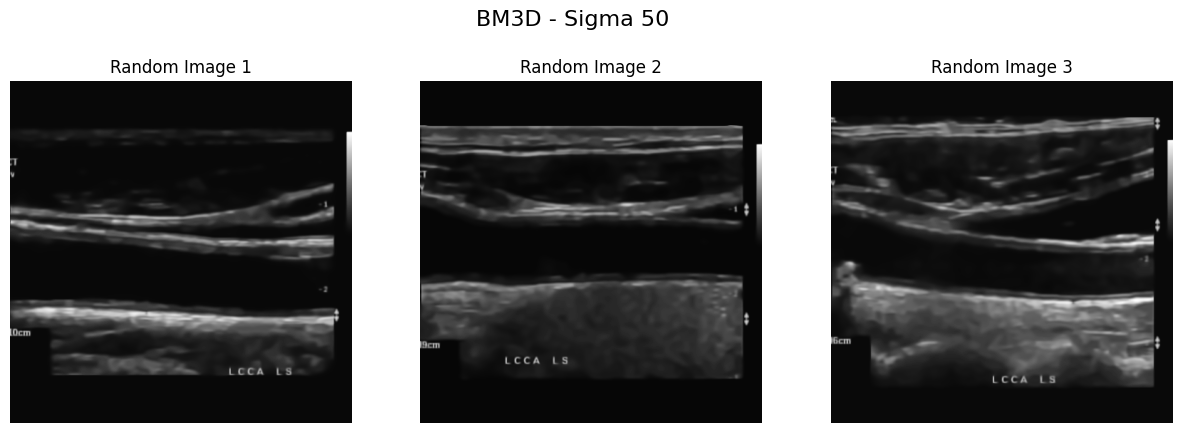

In [120]:
show_set(bm3d_denoising(50/255.0), "BM3D - Sigma 50" )

# Iterative BM3D

In [121]:
def apply_diffusion_bm3d_to_image(image, sigma_noise=25/255.0, iter=10):
    num_iter = iter
    new_image = image
    for i in range(num_iter):
        alpha = (i + 1) / num_iter
        s = sigma_noise - i * sigma_noise / num_iter
        denoised_image = bm3d.bm3d(new_image, sigma_psd=s, stage_arg=bm3d.BM3DStages.ALL_STAGES)
        new_image = alpha * denoised_image + (1 - alpha) * image
    return new_image

def diffusion_bm3d_denoising(sigma_noise=25/255.0, iter=10):
    diffusion_bm3d_denoised = []
    for i, img in enumerate(random_subset):
        # Convert the normalized image back to the range [0, 1]
       
        
        # Apply Diffusion BM3D denoising
        denoised_img = apply_diffusion_bm3d_to_image(img, sigma_noise=sigma_noise, iter=iter)
        
        diffusion_bm3d_denoised.append(denoised_img)
        print(f"Diffusion BM3D Denoised Image {i+1}: Shape = {denoised_img.shape}, Data Type = {denoised_img.dtype}")
    return diffusion_bm3d_denoised

Diffusion BM3D Denoised Image 1: Shape = (480, 480), Data Type = float64
Diffusion BM3D Denoised Image 2: Shape = (480, 480), Data Type = float64
Diffusion BM3D Denoised Image 3: Shape = (480, 480), Data Type = float64


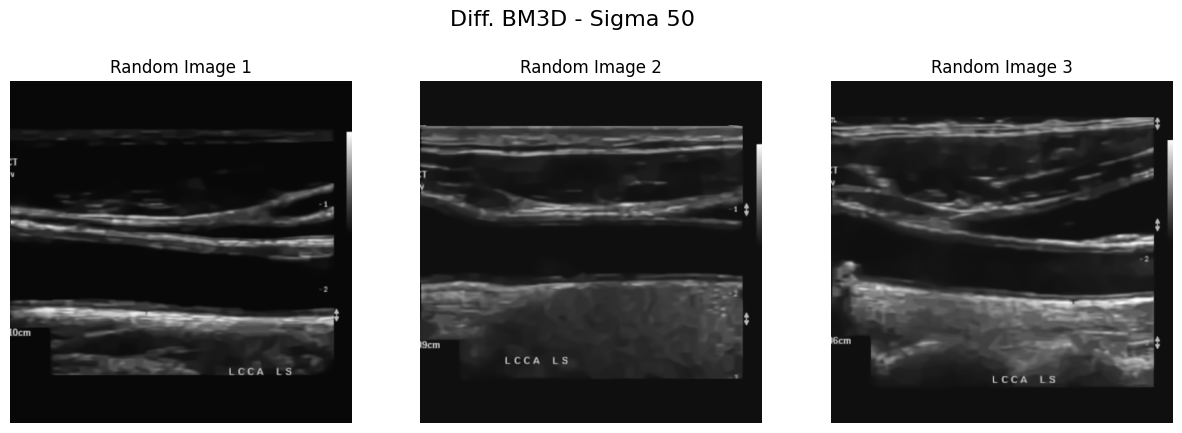

In [126]:
show_set(diffusion_bm3d_denoising(50/255.0), "Diff. BM3D - Sigma 50" )

# Comparison

In [186]:
def show_set(set, title="", color="black"):
    fig, axs = plt.subplots(1, len(set), figsize=(12, 6))
    for i, img in enumerate(set):
        axs[i].imshow(img, cmap="gray")
        axs[i].axis('off')  # Hide the axes
    
    plt.subplots_adjust(left=0.07, right=0.93, top=0.98, bottom=0.02, wspace=0.05)  # Adjust margins and spacing
    fig.text(0.01, 0.5, title, va='center', ha='center', rotation='vertical', fontsize=12, color=color)
    plt.tight_layout(rect=[0.05, 0, 1, 1])  # Ensure the text does not change the shape of the figure
    plt.show()

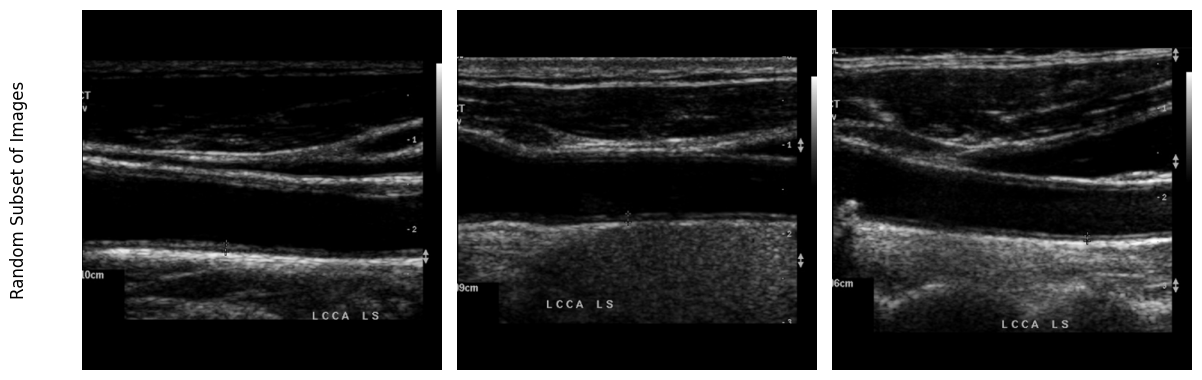

BM3D Denoised Image 1: Shape = (480, 480), Data Type = float64
BM3D Denoised Image 2: Shape = (480, 480), Data Type = float64
BM3D Denoised Image 3: Shape = (480, 480), Data Type = float64


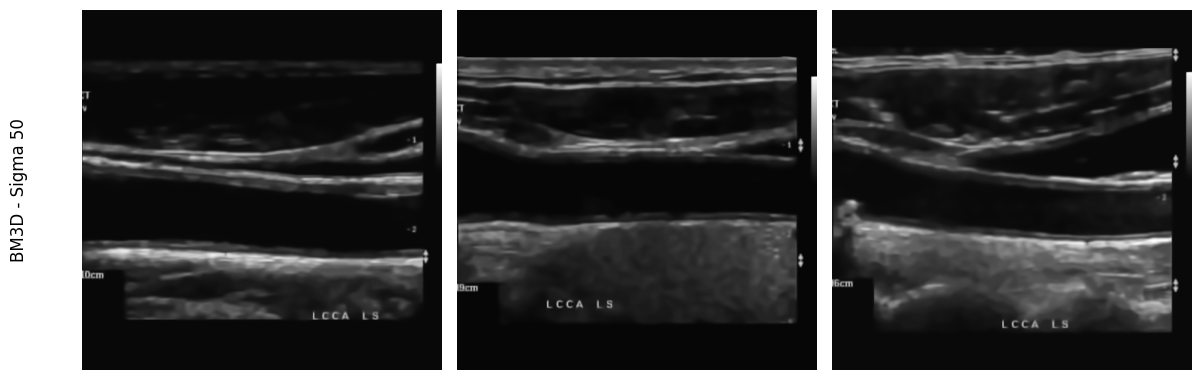

Diffusion BM3D Denoised Image 1: Shape = (480, 480), Data Type = float64
Diffusion BM3D Denoised Image 2: Shape = (480, 480), Data Type = float64
Diffusion BM3D Denoised Image 3: Shape = (480, 480), Data Type = float64


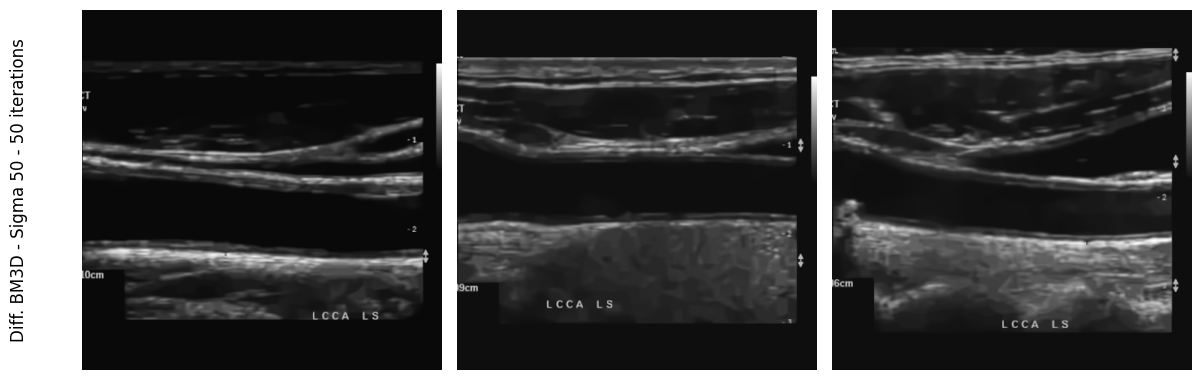

In [187]:
show_set(random_subset, title="Random Subset of Images")
show_set(bm3d_denoising(50/255.0), "BM3D - Sigma 50" )
show_set(diffusion_bm3d_denoising(50/255.0, iter = 50), "Diff. BM3D - Sigma 50 - 50 iterations" )


BM3D Denoised Image 1: Shape = (480, 480), Data Type = float64
BM3D Denoised Image 2: Shape = (480, 480), Data Type = float64
BM3D Denoised Image 3: Shape = (480, 480), Data Type = float64


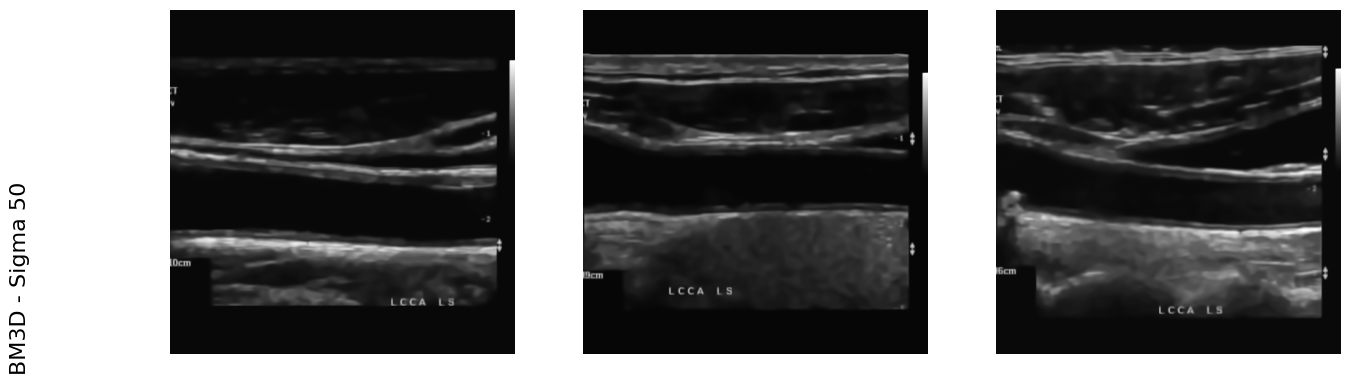

In [129]:
show_set(bm3d_denoising(50/255.0), "BM3D - Sigma 50" )